# Explore here

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression


Carga de datos

In [25]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df = pd.read_csv(url)

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [27]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [28]:
print(df['sex'].unique()) 
print(df['smoker'].unique())

['female' 'male']
['yes' 'no']


In [29]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Exploración visual de los datos

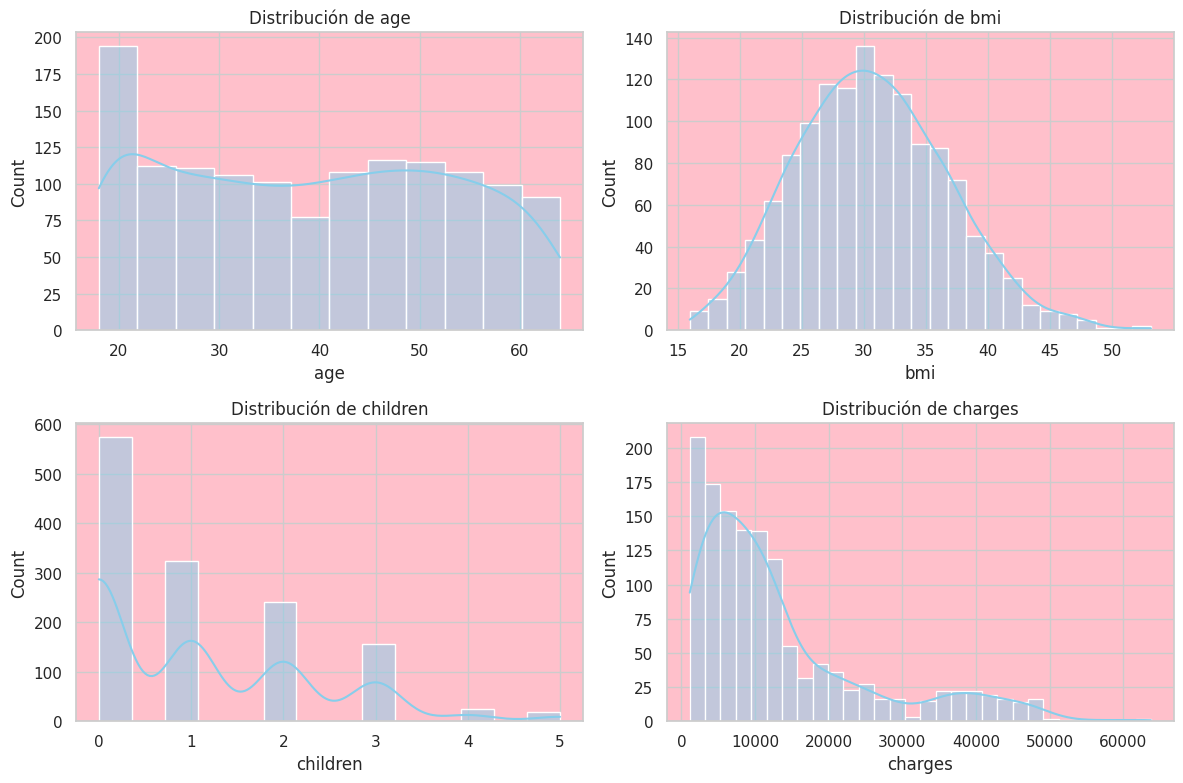

In [30]:
sns.set(style="whitegrid", rc={"axes.facecolor": "pink"}) 

numericas = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numericas):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

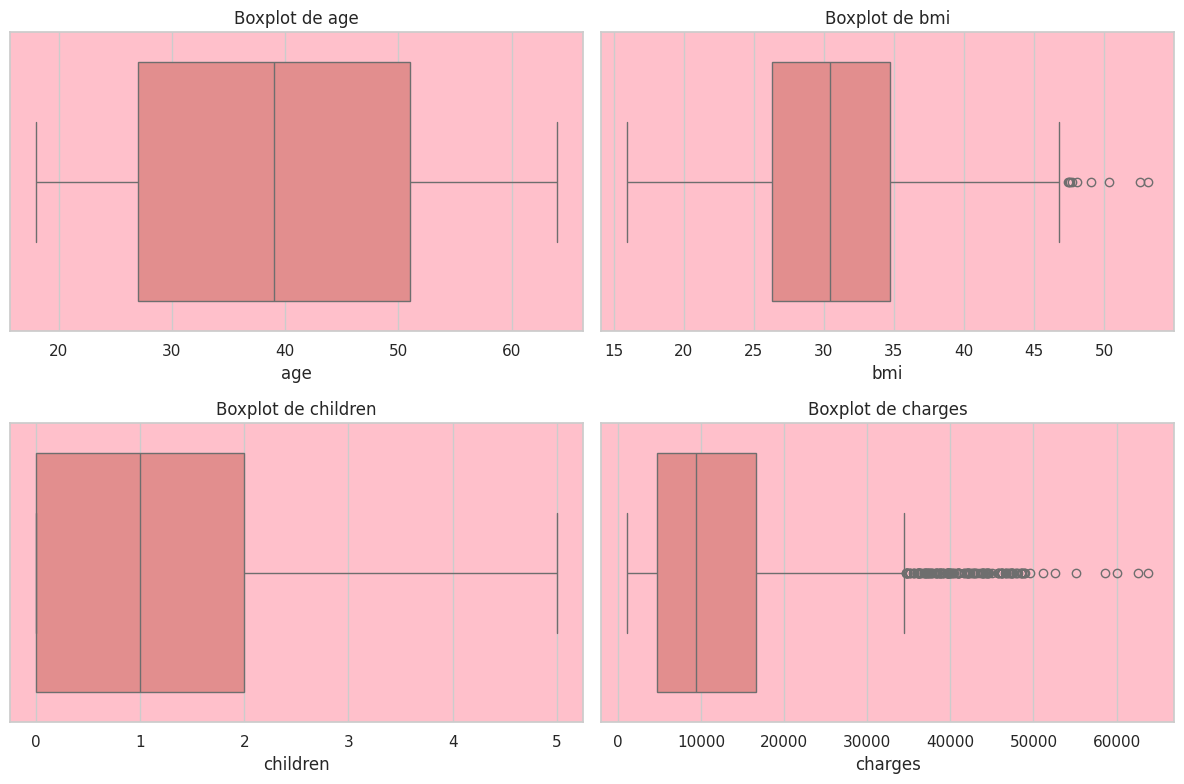

In [31]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numericas):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

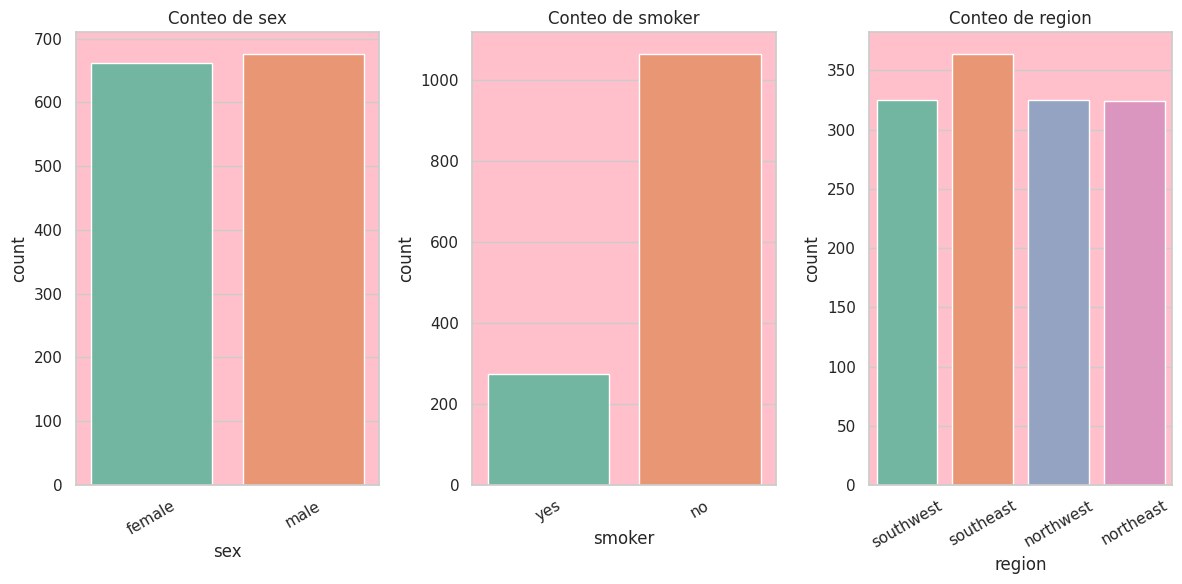

In [32]:
categoricas = ['sex', 'smoker', 'region']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categoricas):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
    plt.title(f'Conteo de {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

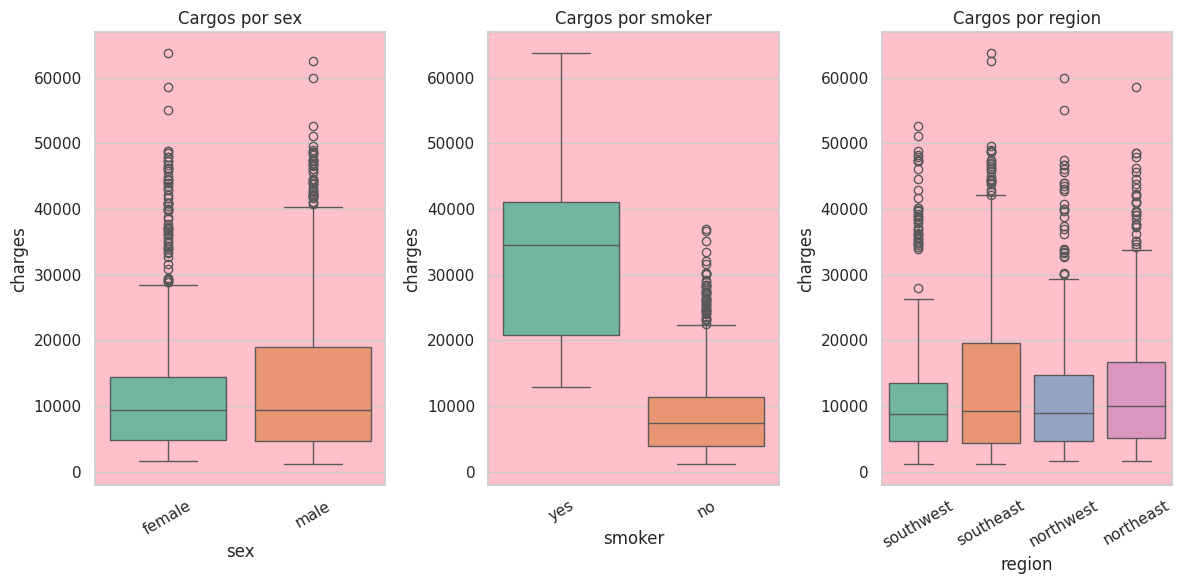

In [33]:

plt.figure(figsize=(12, 6))
for i, col in enumerate(categoricas):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=col, y='charges', data=df, hue=col, palette='Set2', legend=False)
    plt.title(f'Cargos por {col}')
    plt.xticks(rotation=30)
    
    plt.gca().set_facecolor('pink')  # Cambiar fondo a rosa

plt.tight_layout()
plt.show()

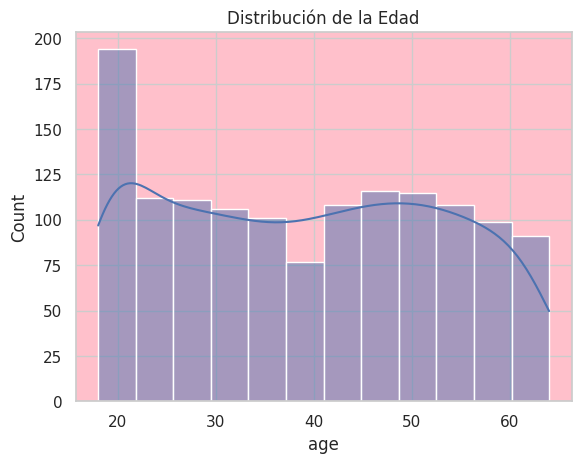

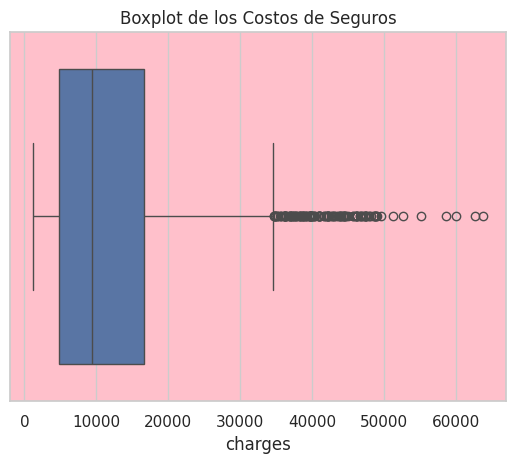

In [34]:

sns.histplot(df['age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

sns.boxplot(x=df['charges'])
plt.title('Boxplot de los Costos de Seguros')
plt.show()

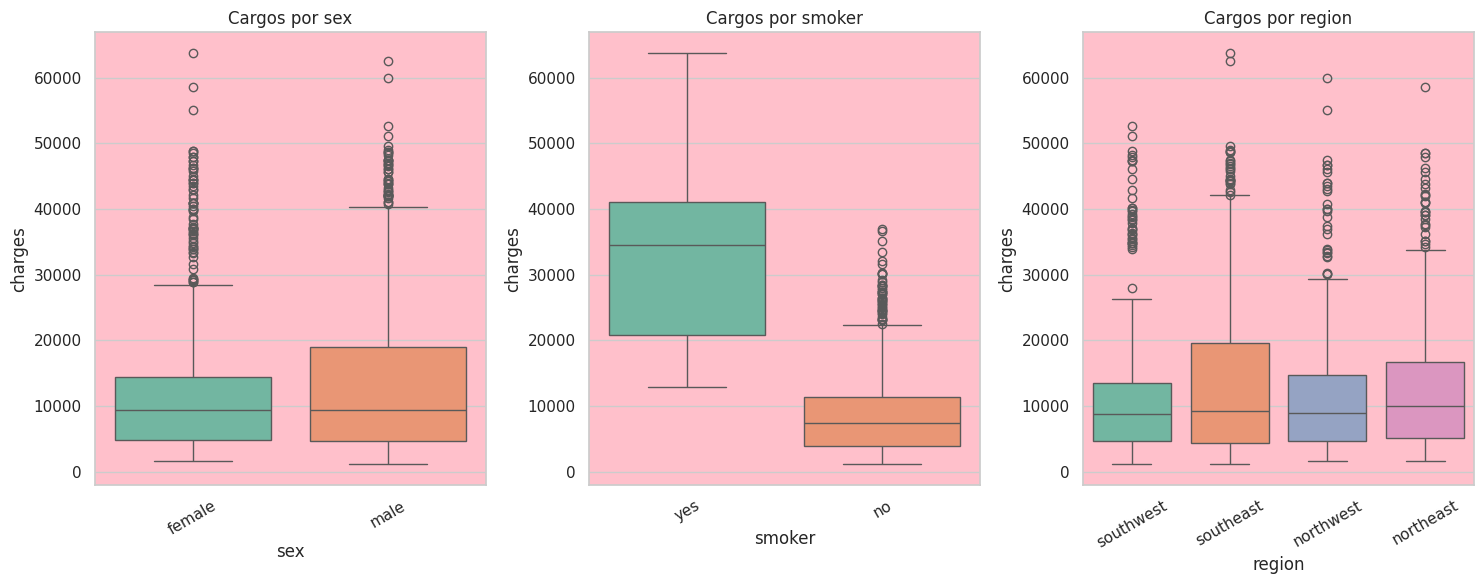

In [35]:
categoricas = ['sex', 'smoker', 'region']

plt.figure(figsize=(15, 6))
for i, col in enumerate(categoricas):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=col, y='charges', data=df, hue=col, palette='Set2', legend=False)  
    plt.title(f'Cargos por {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


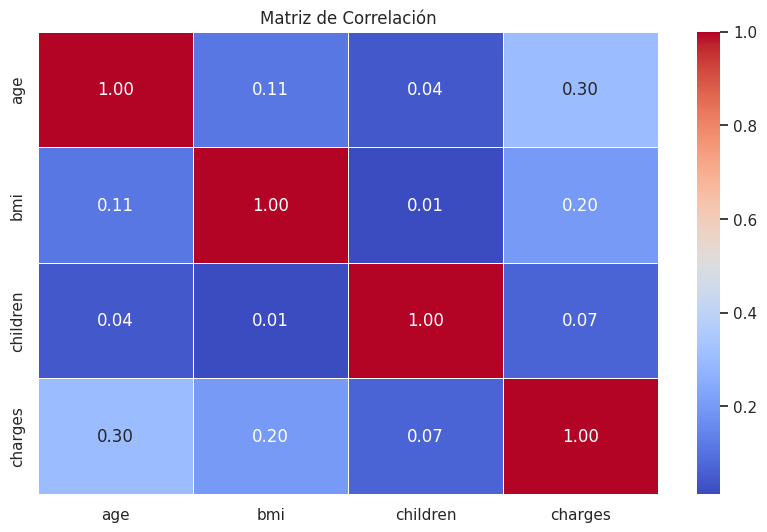

In [36]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Eliminación de outliers.

In [37]:
df = df[
    (df['age'] >= 18) & (df['age'] <= 64) & 
    (df['bmi'] >= 18) & (df['bmi'] <= 50) & 
    (df['children'] >= 0) & (df['children'] <= 5) 
]


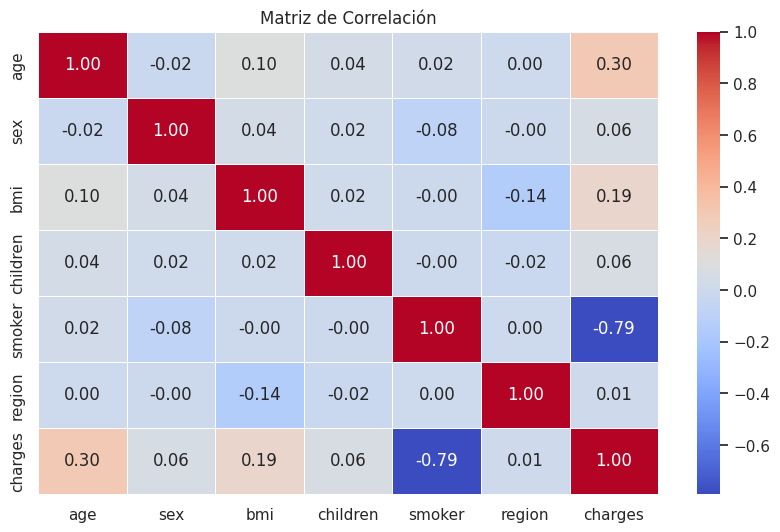

In [38]:
df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]  
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Visualización de variables categóricas factorizadas

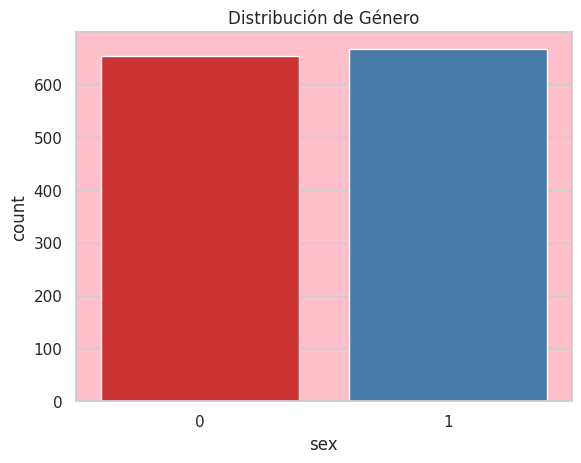

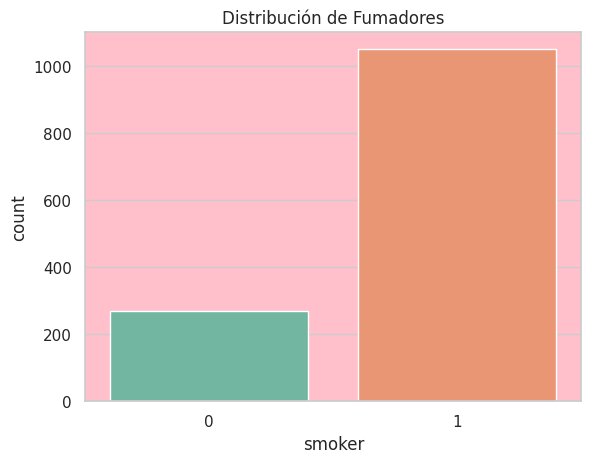

In [39]:

sns.countplot(x='sex', data=df, hue='sex', palette='Set1', legend=False)
plt.title('Distribución de Género')
plt.show()


sns.countplot(x='smoker', data=df, hue='smoker', palette='Set2', legend=False)
plt.title('Distribución de Fumadores')
plt.show()

Escalado

In [40]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns='charges'))
X_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns='charges').columns)


Selección de características

In [41]:
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_scaled, df['charges'])
selected_features = X_scaled.columns[selector.get_support()]
X = X_scaled[selected_features]
y = df['charges']

Split

In [42]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print("Train data:")
print(train_data.head())

print("\nTest data:")
print(test_data.head())

Train data:
     age  sex     bmi  children  smoker  region      charges
607   59    0  23.655         0       0       2  25678.77845
942   18    0  40.185         0       1       3   2217.46915
212   24    1  28.500         2       1       2   3537.70300
547   54    0  46.700         2       1       0  11538.42100
142   34    1  25.300         2       0       1  18972.49500

Test data:
      age  sex     bmi  children  smoker  region      charges
688    47    0  24.100         1       1       0  26236.57997
703    34    0  26.410         1       1       2   5385.33790
619    55    0  37.100         0       1       0  10713.64400
50     18    0  35.625         0       1       3   2211.13075
1308   25    0  30.200         0       0       0  33900.65300


In [43]:
X = df.drop('charges', axis=1)  
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 30370526.89917609
R^2 Score: 0.7799071599770984
